In [2]:
import os
import pandas as pd
from __future__ import print_function

In [9]:
# def collect_all_datasets():
base_dir = os.getcwd()
feature_envy_file_path = os.path.join(base_dir, 'datasets', 'feature-envy-2020+2019+2018.csv')
god_class_file_path = os.path.join(base_dir, 'datasets', 'god-class-2020+2019+2018.csv')
long_method_file_path = os.path.join(base_dir, 'datasets', 'long-method-2020+2019+2018.csv')
path_list = [feature_envy_file_path, god_class_file_path, long_method_file_path]
df = pd.concat([pd.read_csv(path) for path in path_list], ignore_index=True)
df.head()

,username,project,package,complextype,method,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,...,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy,is_god_class,is_long_method
0,2020_Team1,jasml-0.10,com.jasml.decompiler,SourceCodeBuilder,com.jasml.decompiler.SourceCodeBuilder::toStri...,1.0,0.0,7.0,4.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
1,2020_Team1,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0.0,0.0,3.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
2,2020_Team1,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0.0,0.0,3.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
3,2020_Team2,jasml-0.10,com.jasml.decompiler,SourceCodeBuilder,com.jasml.decompiler.SourceCodeBuilder::toStri...,1.0,0.0,7.0,4.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
4,2020_Team2,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0.0,0.0,3.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN


In [10]:
print(df.shape)

(1943, 90)


In [40]:
df_updated = df.iloc[:, 3:]
df_updated = df_updated.drop('method', axis=1)
df_updated.head()

,complextype,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,MAXNESTING_method,LOC_method,CYCLO_method,NMCS_method,...,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy,is_god_class,is_long_method
0,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
1,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
2,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
3,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
4,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN


In [43]:
# Convert all NaN values to False
df_updated = df_updated.fillna(False)
df_updated.head()

,complextype,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,MAXNESTING_method,LOC_method,CYCLO_method,NMCS_method,...,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy,is_god_class,is_long_method
0,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,False,False
1,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,False,False
2,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,False,False
3,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,False,False
4,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,False,False


## Collating similar classes

Now that we have combined all the dataset CSVs into one dataframe, we noticed that there is replication in classes. Given that the metrics have been done for a particular package, there are chances that one class can have more than one type of code smell.  
Our next task should be to create one label column that encompasses all the code smells held by the particular class

In [67]:
df_jaja = df_updated.loc[df_updated['complextype']=='JavaClassDumpper']
df_jaja.shape

(153, 86)

In [56]:
feature_labels = list(df_updated.columns)[1:-3]

In [61]:
code_smell_labels = ['is_feature_envy', 'is_god_class', 'is_long_method']
df_collated = df_updated.groupby('complextype').agg({
    **{feature: 'first' for feature in feature_labels},
}).reset_index()
print(df_collated.shape)

(45, 83)


In [58]:


# df_collated_3 = df_updated.groupby('complextype').agg({
#     **{feature: 'first' for feature in feature_labels},
#     **{label: lambda x: list(x[x]) for label in code_smell_labels}
# }).reset_index()
# 
# df_collated_3['labels'] = df_collated_3.apply(
#     lambda row: [label for label in code_smell_labels if row[label]], axis=1
# )

# df_collated_3.head()

# Find the value 'SourceCodeBuilder' in the 'complextype' column
print(df_collated_3[df_collated_3['complextype'] == 'SourceCodeBuilder'])

# df_long = df_updated.melt(id_vars=['complextype', 'is_feature_envy', 'is_god_class', 'is_long_method'], var_name='code_smell', value_name='is_code_smell', value_vars=code_smell_labels)
# 
# df_long.head()
# 
# # Filter out rows where is_code_smell is False
# df_long = df_long[df_long['is_code_smell']]
# 
# # Group by 'name' and aggregate labels into a list
# df_collated = (
#     df_long.groupby(["complextype", "is_feature_envy", "is_god_class", "is_long_method"])["code_smell"]
#     .apply(list)
#     .reset_index()
# )
# 
# print(df_collated)

          complextype NOP_method CC_method ATFD_method FDP_method CM_method  \
16  SourceCodeBuilder        1.0       0.0         7.0        4.0       0.0   

   MAXNESTING_method LOC_method CYCLO_method NMCS_method  ...  \
16               2.0       12.0          3.0         0.0  ...   

   number_constructor_NotDefaultConstructor_methods  \
16                                                2   

   num_final_static_attributes num_not_final_not_static_attributes  \
16                           0                                   2   

   num_final_not_static_attributes num_static_not_final_attributes  \
16                               0                               0   

   isStatic_method                                    is_feature_envy  \
16             0.0  [True, True, True, True, True, True, True, Tru...   

    is_god_class is_long_method  \
16  [True, True]   [True, True]   

                                             labels  
16  [is_feature_envy, is_god_class, is_long_m

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_updated.iloc[:, 1:]
X.head()

,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,MAXNESTING_method,LOC_method,CYCLO_method,NMCS_method,NOLV_method,...,number_not_final_not_static_methods,number_standard_design_methods,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy
0,1,0,7,4,0,2,12,3,0,3,...,30,29,0,2,0,2,0,0,0,True
1,0,0,3,1,0,1,5,1,0,0,...,10,9,0,1,0,3,0,0,0,False
2,0,0,3,1,0,1,5,1,0,0,...,10,9,0,1,0,3,0,0,0,False
3,1,0,7,4,0,2,12,3,0,3,...,30,29,0,2,0,2,0,0,0,True
4,0,0,3,1,0,1,5,1,0,0,...,10,9,0,1,0,3,0,0,0,False


In [40]:
# Split into training and testing sets (80% train, 20% test)
# Split into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(X, test_size=0.2, random_state=42)

# Split training data into training and validation sets (70% train, 30% validation)
train_data, val_data = train_test_split(train_data, test_size=0.3, random_state=42)

# Separate features and target
X_train = train_data.drop('is_feature_envy', axis=1)
y_train = train_data['is_feature_envy']
X_val = val_data.drop('is_feature_envy', axis=1)
y_val = val_data['is_feature_envy']
X_test = test_data.drop('is_feature_envy', axis=1)
y_test = test_data['is_feature_envy']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the results
print(f'Scaled Training Set: {X_train_scaled.shape}')
print(f'Scaled Validation Set: {X_val_scaled.shape}')
print(f'Scaled Test Set: {X_test_scaled.shape}')

Scaled Training Set: (184, 82)
Scaled Validation Set: (80, 82)
Scaled Test Set: (66, 82)


In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer with 128 units
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
    layers.Dense(32, activation='relu'),  # Additional hidden layer with 32 units
    layers.Dense(16, activation='relu'),  # Another hidden layer with 16 units
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class
              metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,505 (84.00 KB)

 Trainable params: 21,505 (84.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_val_scaled, y_val), 
                    epochs=50,  # Number of epochs
                    batch_size=32)  # Size of batches


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5173 - loss: 0.6891 - val_accuracy: 0.4625 - val_loss: 0.6957
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5617 - loss: 0.6719 - val_accuracy: 0.4750 - val_loss: 0.6876
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6148 - loss: 0.6635 - val_accuracy: 0.5125 - val_loss: 0.6860
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 0.6669 - val_accuracy: 0.5375 - val_loss: 0.6863
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5774 - loss: 0.6631 - val_accuracy: 0.5375 - val_loss: 0.6900
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5527 - loss: 0.6765 - val_accuracy: 0.5375 - val_loss: 0.6909
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - loss: 0.6623 - val_accuracy: 0.5125 - val_loss: 0.6906
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5782 - loss: 0.6645 - val_accuracy: 0.5375 - val_loss: 0.6785
Epoch 9

In [47]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5503 - loss: 1.1380  
Test Accuracy: 0.53


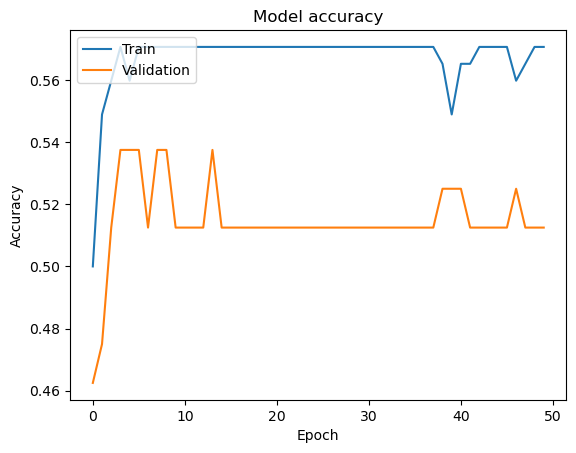

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model
def create_model(learning_rate=0.01):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Print best parameters
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'